<img src="https://www.scratchapixel.com/images/geometry/projectvec.gif" alt="Illustrating the projection of vector onto the xy plane, highlighting the adjustment of its length based on sin(delta)"></img>

# Angles and Great Circles

---

## Overview
Angles are formed by the intersection of great circle paths.

- Calculate the acute and obtuse angle of two Great Circle paths
- Calculate the Directed Angle of two Great Circle paths based on an intersection point
- Working with Spherical Triangles formed by great circle arcs (TODO)

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Numpy](https://foundations.projectpythia.org/core/numpy.html) | Necessary | |
| [Pandas](https://foundations.projectpythia.org/core/numpy.html) | Necessary | |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Will be used for plotting |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) | Helpful | Will be used for plotting |

- **Time to learn**: 40 minutes

---

## Imports

- Import Packages
- Setup location dataframe with coordinates

In [2]:
import pandas as pd       # reading in data for location information from text file
import numpy as np        # working with arrays, vectors, cross/dot products, and radians

from pyproj import Geod   # working with the Earth as an ellipsod (WGS-84)
import geopy.distance     # working with the Earth as an ellipsod

import matplotlib.pyplot as plt                        # plotting a graph
from cartopy import crs as ccrs, feature as cfeature   # plotting a world map

In [3]:
# Get all Coordinates for Locations
location_df = pd.read_csv("../location_full_coords.txt")
location_df = location_df.rename(columns=lambda x: x.strip()) # strip excess white space from column names and values
location_df.head()

,name,latitude,longitude,cart_x,cart_y,cart_z,rho,theta,phi,polar_x,polar_y,polar_z
0,arecibo,18.3441,-66.7527,2.389526e+06,-5.562495e+06,2.007347e+06,6378137.0,-1.165054,1.250631,-5.562495e+06,2.389526e+06,2.007347e+06
1,boulder,40.0150,-105.2705,-1.286558e+06,-4.712394e+06,4.101066e+06,6378137.0,1.304276,0.872403,-4.712394e+06,-1.286558e+06,4.101066e+06
2,boston,42.3601,-71.0589,1.529809e+06,-4.457769e+06,4.297512e+06,6378137.0,-1.240212,0.831473,-4.457769e+06,1.529809e+06,4.297512e+06
3,redwoods,41.4017,-124.0417,-2.678169e+06,-3.964322e+06,4.218080e+06,6378137.0,0.976657,0.848200,-3.964322e+06,-2.678169e+06,4.218080e+06
4,houston,29.5518,-95.0982,-4.930480e+05,-5.526456e+06,3.145762e+06,6378137.0,1.481816,1.055020,-5.526456e+06,-4.930480e+05,3.145762e+06


In [4]:
location_df.index = location_df["name"]

In [5]:
location_df.loc["boulder", "latitude"]

40.015

## Calculate the acute and obtuse angle of two great circle paths

The acute and obtuse angle formed by two great circle paths and an intersection point.

In [15]:
def angle_between_arcs(start_gc1=None, end_gc1=None,
                       start_gc2=None, end_gc2=None):
    # get normal of planes containing great circles
    normal_one = np.cross([location_df.loc[start_gc1, "cart_x"],
                           location_df.loc[start_gc1, "cart_y"],
                           location_df.loc[start_gc1, "cart_z"]],
                          [location_df.loc[end_gc1, "cart_x"],
                           location_df.loc[end_gc1, "cart_y"],
                           location_df.loc[end_gc1,"cart_z"]])
    normal_two = np.cross([location_df.loc[start_gc2, "cart_x"],
                           location_df.loc[start_gc2, "cart_y"],
                           location_df.loc[start_gc2, "cart_z"]],
                          [location_df.loc[end_gc2, "cart_x"],
                           location_df.loc[end_gc2, "cart_y"],
                           location_df.loc[end_gc2,"cart_z"]])
    # dot product to obtain the angle between the normal planes
    angle_between_planes = np.dot(normal_one, normal_two)
    # divide by the magnitude of the vectors, inverse of cos to find angle
    angle = np.arccos(np.dot(normal_one, normal_two) / 
                    (np.linalg.norm(normal_one) * np.linalg.norm(normal_two)))
    obtuse_acute_angle = (np.rad2deg(angle), ((360-(2*np.rad2deg(angle)))/2))
    obtuse_angle = np.max(obtuse_acute_angle)
    print(f"Acute Angle  = {np.min(obtuse_acute_angle)} degrees")
    print(f"Obtuse Angle = {np.max(obtuse_acute_angle)} degrees")
    return obtuse_acute_angle

In [16]:
angle_between_arcs("boulder", "boston", "johannesburg", "reykjavík")

Acute Angle  = 30.646334650419135 degrees
Obtuse Angle = 149.35366534958087 degrees


(149.35366534958087, 30.646334650419135)

## Calculate the Directed Angle of two Great Circle paths based on an intersection point

Calculate the directed angle of two great circle paths based on an intersection point.

### Overview of Directed Angles

TODO

`Finds the directed angle between two great circles defined by three points: A, B, C where A->B and A->C are arcs on the great circle (where A is where the arcs intersect`

`Returned angle is positive if C is to the left of the great circles A->B`

`Returned angle is negative if C is to the right of the great circles A->B`

> Directed angle is in the standard position if it satistfies two conditions:
>
> Its vertex is the origin of rectangular coordinates system
> Its initial side lies on the positive direction of the x-axis
>
> The directed angle resulting from an anticlockwise rotation has a positive measure
>
> The directed angle resulting from a clockwise rotation has a negative measure

In [18]:
def directed_angle(b_coords=None, c_coords=None, a_coords=None):
    # determine cartesian_coordinates from intersect points
    earth_radius = 6378137  # meters
    latitude = np.deg2rad(a_coords[0])
    longitude = np.deg2rad(a_coords[1])
    cart_x = earth_radius * np.cos(latitude) * np.cos(longitude)
    cart_y = earth_radius * np.cos(latitude) * np.sin(longitude)
    cart_z = earth_radius * np.sin(latitude)

    # get normal of planes containing great circles
    normal_one = np.cross([cart_x,
                           cart_y,
                           cart_z],
                          [location_df.loc[b_coords, "cart_x"],
                           location_df.loc[b_coords, "cart_y"],
                           location_df.loc[b_coords, "cart_z"]])
    normal_two = np.cross([cart_x,
                           cart_y,
                           cart_z],
                          [location_df.loc[c_coords, "cart_x"],
                           location_df.loc[c_coords, "cart_y"],
                           location_df.loc[c_coords, "cart_z"]])
    # dot product to obtain the angle between the normal planes
    angle_between_planes = np.dot(normal_one, normal_two)
    # divide by the magnitude of the vectors, inverse of cos to find angle
    angle = np.arccos(np.dot(normal_one, normal_two) / 
                    (np.linalg.norm(normal_one) * np.linalg.norm(normal_two)))
    angle = np.rad2deg(angle)

    # take the cross product of two vectors A->B and A->C
    v_ab = np.array([[cart_x,
                    cart_y,
                    cart_z],
                    [location_df.loc[b_coords, "cart_x"],
                     location_df.loc[b_coords, "cart_y"],
                     location_df.loc[b_coords, "cart_z"]]])
    v_ac = np.array([[cart_x,
                    cart_y,
                    cart_z],
                    [location_df.loc[c_coords, "cart_x"],
                     location_df.loc[c_coords, "cart_y"],
                     location_df.loc[c_coords, "cart_z"]]])

    cross_prod = np.cross(v_ab, v_ac)
    # inverse of the sign of the cross product
    sign_angle = -1*np.sign(cross_prod[1][-1]) * angle
    return sign_angle

### Calculate Intersection Point Between Two Great Circle Paths 

See previous section for more details

In [25]:
def intersection_of_gc(start_gc1=None, end_gc1=None,
                      start_gc2=None, end_gc2=None):
    # get normal of planes containing great circles

    # cross product of vectors
    normal_one = np.cross([location_df.loc[start_gc1, "cart_x"],
                           location_df.loc[start_gc1, "cart_y"],
                           location_df.loc[start_gc1, "cart_z"]],
                          [location_df.loc[end_gc1, "cart_x"],
                           location_df.loc[end_gc1, "cart_y"],
                           location_df.loc[end_gc1, "cart_z"]])
    normal_two = np.cross([location_df.loc[start_gc2, "cart_x"],
                           location_df.loc[start_gc2, "cart_y"],
                           location_df.loc[start_gc2, "cart_z"]],
                          [location_df.loc[end_gc2, "cart_x"],
                           location_df.loc[end_gc2, "cart_y"],
                           location_df.loc[end_gc2, "cart_z"]])
    # intersection of planes, normal to the poles of each plane
    line_of_intersection = np.cross(normal_one, normal_two)
    # intersection points (one on each side of the earth)
    x1 = line_of_intersection /  np.sqrt(line_of_intersection[0]**2 + line_of_intersection[1]**2 + line_of_intersection[2]**2) 
    x2 = -x1
    lat1 = np.rad2deg(np.arctan2(x1[2], np.sqrt(pow(x1[0],2)+pow(x1[1],2))))
    lon1 = np.rad2deg(np.arctan2(x1[1], x1[0]))
    lat2 = np.rad2deg(np.arctan2(x2[2], np.sqrt(pow(x2[0],2)+pow(x2[1],2))))
    lon2 = np.rad2deg(np.arctan2(x2[1], x2[0]))
    return [(lat1, lon1), (lat2, lon2)]

In [26]:
intersect_pts = intersection_of_gc("boulder", "boston", "johannesburg", "reykjavík")
intersect_pts

[(-12.168951714418203, 22.96514530459759),
 (12.168951714418203, -157.0348546954024)]

In [27]:
# Arcs defined as A->B and A->C where A is the intersection
directed_angle(a_coords=intersect_pts[0],
               b_coords="boulder",
               c_coords="reykjavík")

-30.646334650419192

In [28]:
# Arcs defined as A->B and A->C where A is the intersection
directed_angle(a_coords=intersect_pts[-1],
               b_coords="boulder",
               c_coords="reykjavík")

-30.646334650419192

### Plot Directed Angle

Clockwise and Counterclockwise

In [29]:
# See previous section for more information

# Generate Latitude Coordinates based on Longitude Coordinates
def generate_latitude_along_gc(start_lat=None, start_lon=None,
                               end_lat=None, end_lon=None,
                               number_of_lon_pts=360):
    lon1 = np.deg2rad(start_lon)
    lat1 = np.deg2rad(start_lat)
    lon2 = np.deg2rad(end_lon)
    lat2 = np.deg2rad(end_lat)

    # Verify not meridian (longitude passes through the poles)
    if np.sin(lon1 - lon2) == 0:
        print("Invalid inputs: start/end points are meridians")
        # plotting meridians at 0 longitude through all latitudes
        meridian_lat = np.arange(-90, 90, 180/len(longitude_lst)) # split in n number
        meridians = []
        for lat in meridian_lat:
            meridians.append((lat, 0))
        return meridians

    # verify not anitpodal (diametrically opposite, points)
    if lat1 + lat2 == 0 and abs(lon1-lon2) == np.pi:
        print("Invalid inputs: start/end points are antipodal")
        return []

    # note: can be expanded to handle input of np arrays by filter out antipodal/merdiain points

    # generate n total number of longitude points along the great circle
    # https://github.com/rspatial/geosphere/blob/master/R/greatCircle.R#L18C3-L18C7
    gc_lon_lst = []
    for lon in range(1, number_of_lon_pts+1):
        new_lon = (lon  * (360/number_of_lon_pts) - 180)
        gc_lon_lst.append(np.deg2rad(new_lon))

    # Intermediate points on a great circle: https://edwilliams.org/avform147.htm"
    gc_lat_lon = []
    for gc_lon in gc_lon_lst:
        num = np.sin(lat1)*np.cos(lat2)*np.sin(gc_lon-lon2)-np.sin(lat2)*np.cos(lat1)*np.sin(gc_lon-lon1)
        den = np.cos(lat1)*np.cos(lat2)*np.sin(lon1-lon2)
        new_lat = np.arctan(num/den)
        gc_lat_lon.append((np.rad2deg(new_lat), np.rad2deg(gc_lon)))
    return gc_lat_lon

def interpolate_points_along_gc(lat_start=None, lon_start=None,
                                lat_end=None, lon_end=None,
                                distance_between_points_meter=0): 
    geodesic = Geod(ellps="WGS84")
    
    lat_lon_points = [(lat_start, lon_start)]
    
    # move to next point when distance between points is less than the equal distance
    move_to_next_point = True
    while(move_to_next_point):
        forward_bearing, _, distance_meters = geodesic.inv(lon_start,
                                                            lat_start, 
                                                            lon_end,
                                                            lat_end)
        if distance_meters < distance_between_points_meter:
            # ends before overshooting
            move_to_next_point = False
        else:
            start_point = geopy.Point(lat_start, lon_start)
            distance_to_move = geopy.distance.distance(
                            kilometers=distance_between_points_meter /
                            1000)  # distance to move towards the next point
            final_position = distance_to_move.destination(
                            start_point, bearing=forward_bearing)
            lat_lon_points.append((final_position.latitude, final_position.longitude))
            # new starting position is newly found end position
            lon_start, lat_start = final_position.longitude, final_position.latitude
    lat_lon_points.append((lat_end, lon_end))
    return lat_lon_points

def arc_points(start_lat=None, start_lon=None,
               end_lat=None, end_lon=None,
               n_total_points=10):

    geodesic = Geod(ellps="WGS84")

    _, _, distance_meter =  geodesic.inv(start_lon,
                                        start_lat,
                                        end_lon,
                                        end_lat)
        
    distance_between_points_meter = distance_meter / (n_total_points + 1)

    
    points_along_arc = interpolate_points_along_gc(start_lat, start_lon,
                                                   end_lat, end_lon,
                                                    distance_between_points_meter)
    return points_along_arc

In [30]:
def plot_gc_directed_angle(a_coords=None, b_coords=None,c_coords=None,
                           angle=None,
                           lon_west=-180, lon_east=180,
                           lat_south=-90, lat_north=90):
    # A = intersect point
    # A->B and A->C where C is the angle to determine sign

    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")

    # Plot Great Circle Path
    gc_one_lat_pts = generate_latitude_along_gc(start_lat=a_coords[0],
                                                start_lon=a_coords[1],
                                                end_lat=location_df.loc[b_coords, "latitude"],
                                                end_lon=location_df.loc[b_coords, "longitude"])
    longitudes = [x[1] for x in gc_one_lat_pts] # longitude
    latitudes = [x[0] for x in gc_one_lat_pts] # latitude
    plt.plot(longitudes, latitudes)
    gc_two_lat_pts =  generate_latitude_along_gc(start_lat=a_coords[0],
                                                start_lon=a_coords[1],
                                                end_lat=location_df.loc[c_coords, "latitude"],
                                                end_lon=location_df.loc[c_coords, "longitude"])
    longitudes = [x[1] for x in gc_two_lat_pts] # longitude
    latitudes = [x[0] for x in gc_two_lat_pts] # latitude
    plt.plot(longitudes, latitudes)

    # Plot Great Circle Arc
    gc_one_arc_pts = arc_points(start_lat=a_coords[0],
                               start_lon=a_coords[1],
                               end_lat=location_df.loc[b_coords, "latitude"],
                               end_lon=location_df.loc[b_coords, "longitude"])
    longitudes = [x[1] for x in gc_one_arc_pts] # longitude
    latitudes = [x[0] for x in gc_one_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="pink")
    gc_two_arc_pts = arc_points(start_lat=a_coords[0],
                               start_lon=a_coords[1],
                               end_lat=location_df.loc[c_coords, "latitude"],
                               end_lon=location_df.loc[c_coords, "longitude"])
    longitudes = [x[1] for x in gc_two_arc_pts] # longitude
    latitudes = [x[0] for x in gc_two_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="green")

    # plot A, B, C points in different colors
    fz = 30
    offset = 3
    plt.scatter(a_coords[1], a_coords[0], s=100, c="red", label="A")
    ax.annotate("A", (a_coords[1]+offset, a_coords[0]+offset), fontsize=fz)
    plt.scatter(location_df.loc[b_coords, "longitude"],
               location_df.loc[b_coords, "latitude"],
                s=100, c="blue", label="B")
    ax.annotate("B", (location_df.loc[b_coords, "longitude"]-(4*offset),
                      location_df.loc[b_coords, "latitude"]-offset),
                        fontsize=fz)
    plt.scatter(location_df.loc[c_coords, "longitude"],
                location_df.loc[c_coords, "latitude"], 
                s=100, c="cyan", label="C")
    ax.annotate("C", (location_df.loc[c_coords, "longitude"]+offset,
                      location_df.loc[c_coords, "latitude"]+offset),
                        fontsize=fz)
    ax.quiver(location_df.loc[b_coords, "longitude"],
              location_df.loc[b_coords, "latitude"], 
              (location_df.loc[c_coords, "longitude"]-location_df.loc[b_coords, "longitude"]), 
              (location_df.loc[c_coords, "latitude"]-location_df.loc[b_coords, "latitude"]), 
              angles='xy', scale_units='xy', scale=1)    
    
    if angle > 0: 
        sign = "Counterclockwise"
    if angle < 0: 
        sign = "Clockwise"
    if angle == 0:
        sign = "Colinear"
    plt.title(f"Direction = {sign}, {angle}")
    plt.legend()
    plt.show()

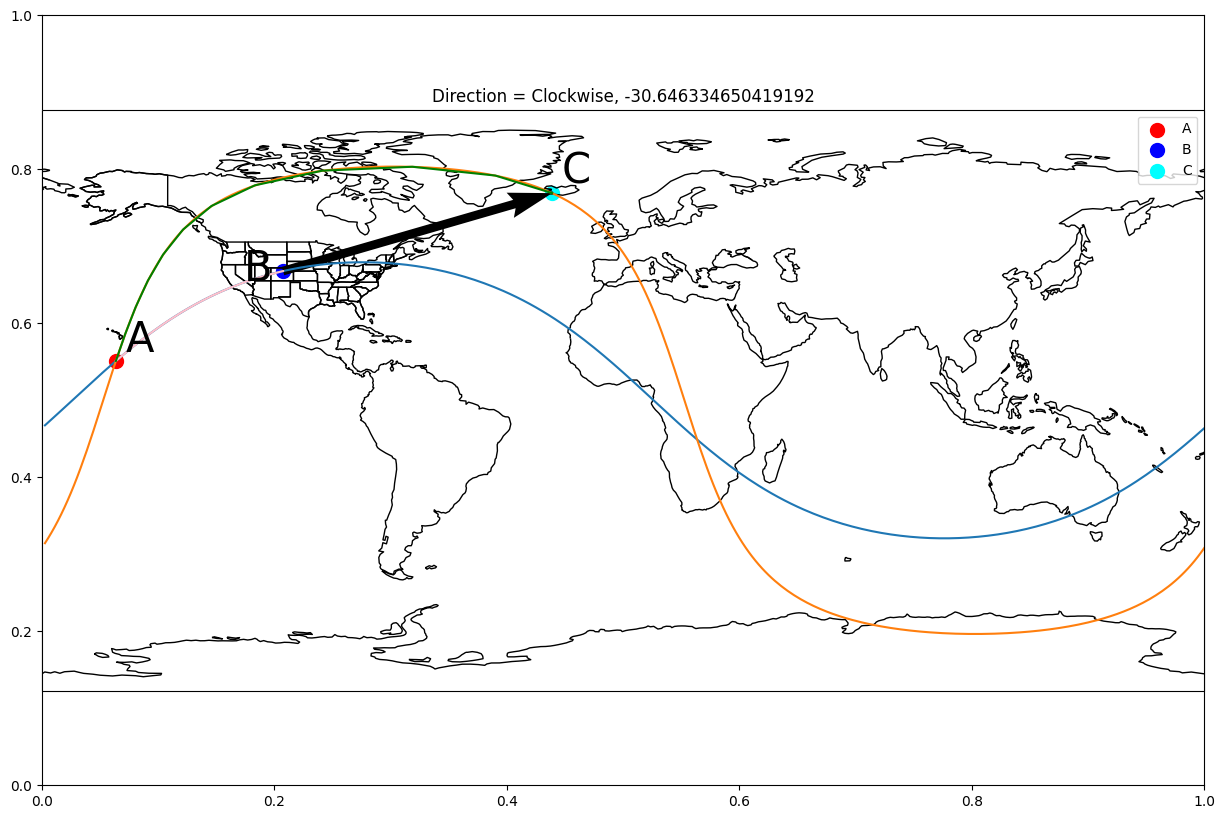

In [31]:
# Arcs defined as A->B and A->C where A is the intersection
intersect_pts = intersection_of_gc("boulder", "boston", "reykjavík", "johannesburg")

direct_angle = directed_angle(a_coords=intersect_pts[0],
                              b_coords="boulder",
                              c_coords="reykjavík")

plot_gc_directed_angle(a_coords=intersect_pts[0],
                       b_coords="boulder",
                       c_coords="reykjavík",
                       angle=direct_angle)

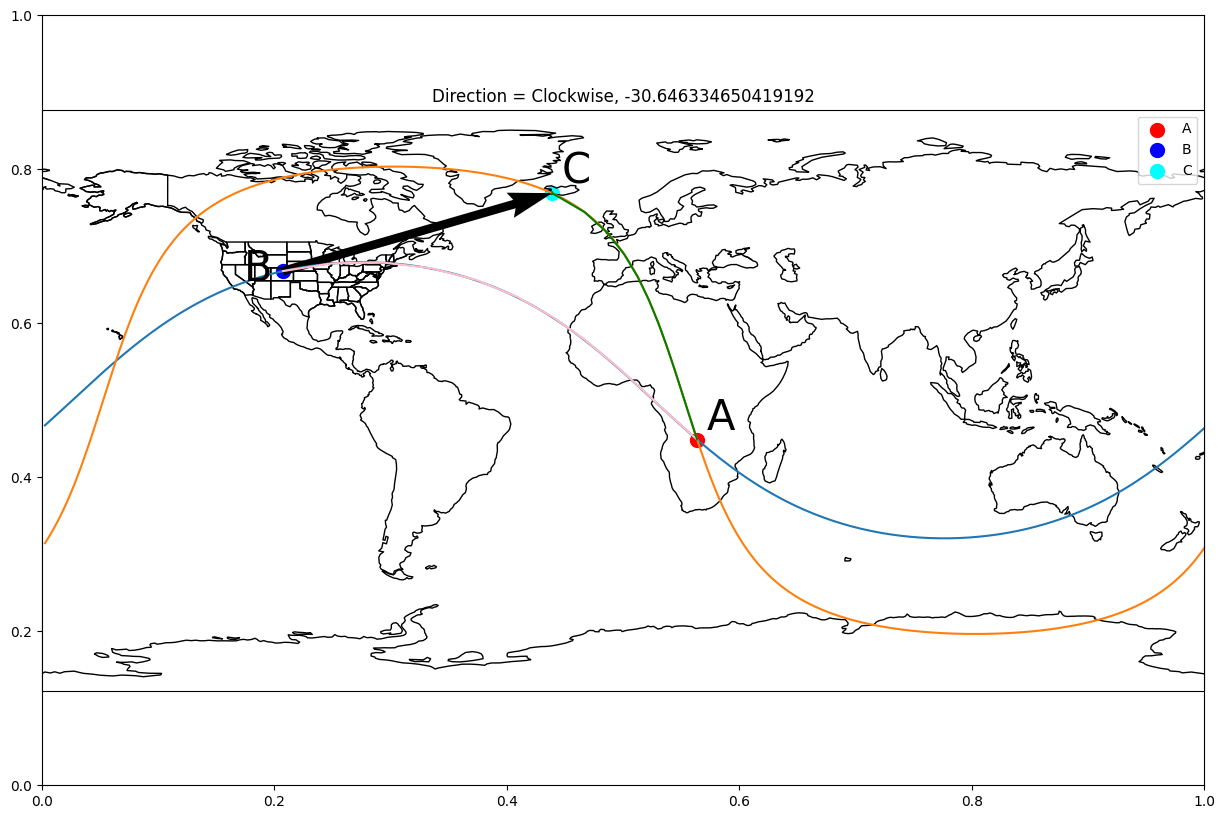

In [33]:
# Arcs defined as A->B and A->C where A is the intersection
intersect_pts = intersection_of_gc("boulder", "boston", "reykjavík", "johannesburg")

direct_angle = directed_angle(a_coords=intersect_pts[-1],
                              b_coords="boulder",
                              c_coords="reykjavík")

plot_gc_directed_angle(a_coords=intersect_pts[-1],
                       b_coords="boulder",
                       c_coords="reykjavík",
                       angle=direct_angle)

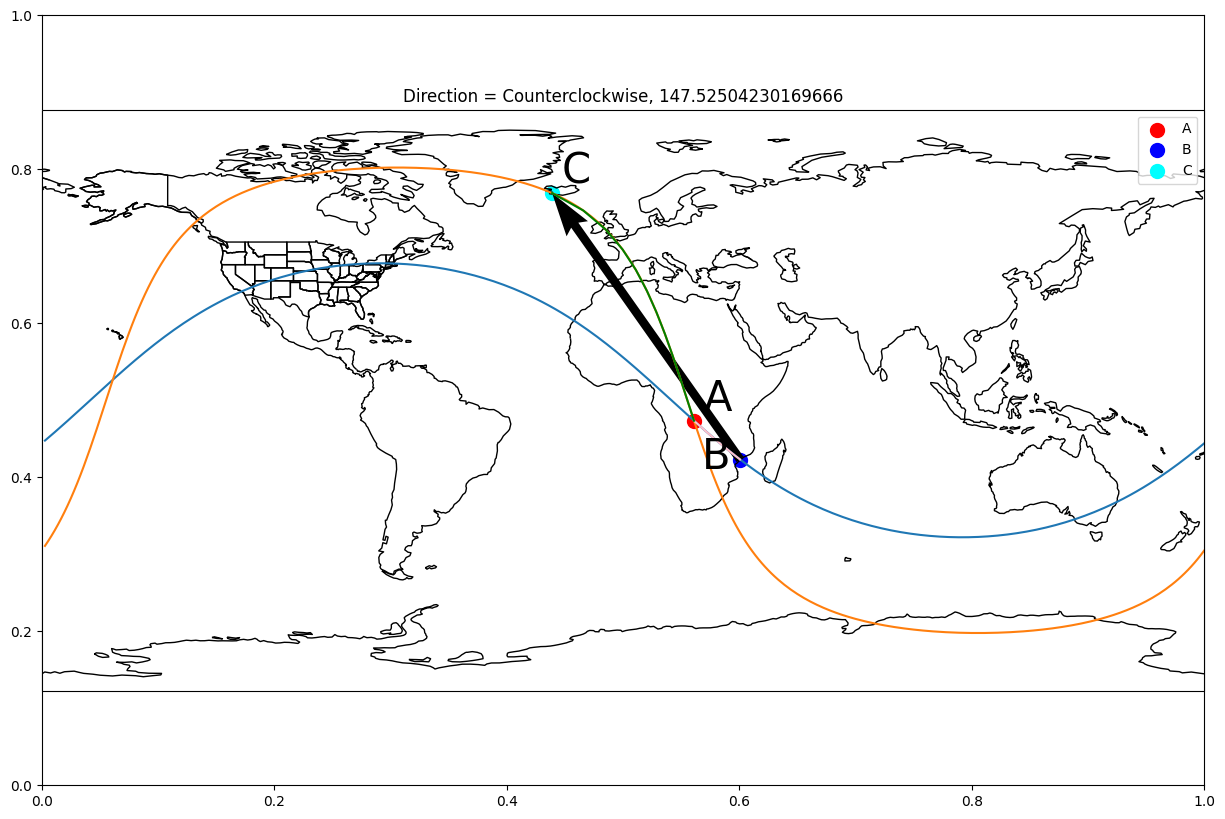

In [34]:
# Arcs defined as A->B and A->C where A is the intersection
intersect_pts = intersection_of_gc("zambezi", "boston", "greenwich", "johannesburg")

direct_angle = directed_angle(a_coords=intersect_pts[0],
                              b_coords="zambezi",
                              c_coords="greenwich")

plot_gc_directed_angle(a_coords=intersect_pts[0],
                       b_coords="zambezi",
                       c_coords="reykjavík",
                       angle=direct_angle)

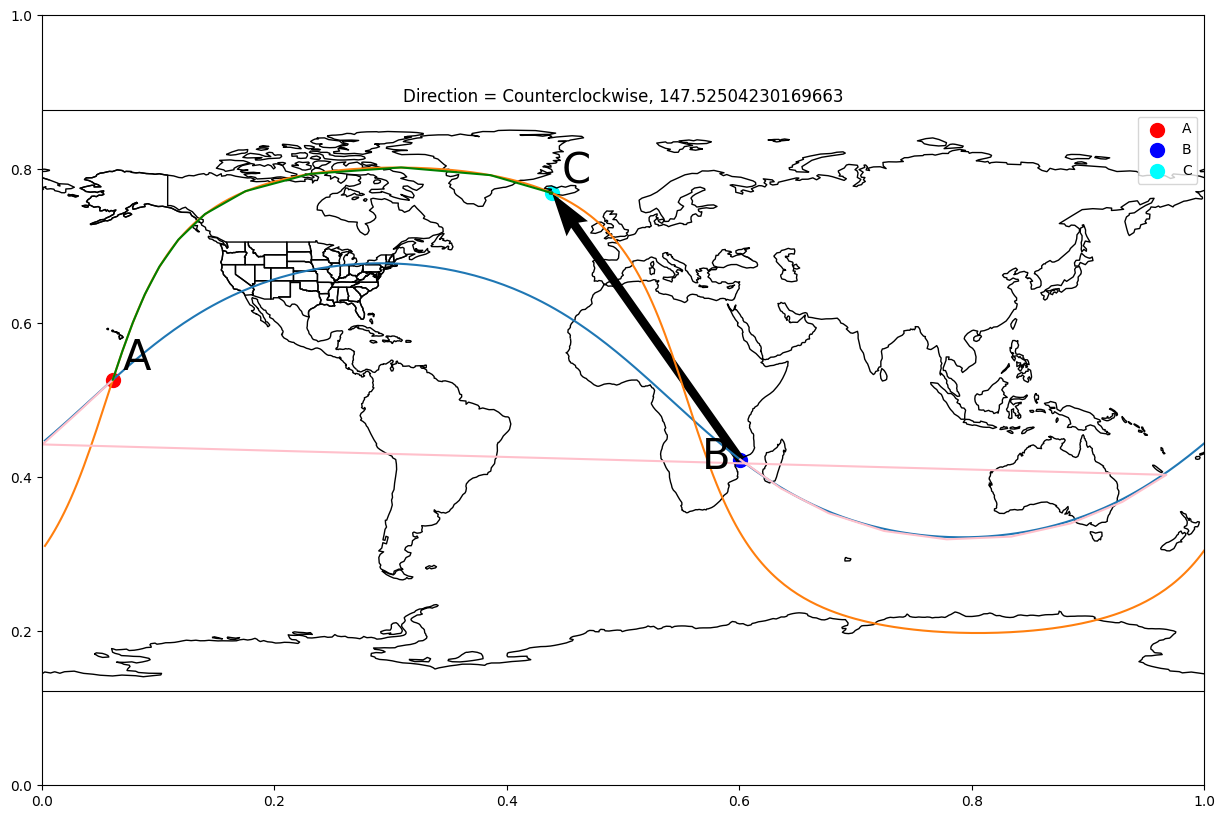

In [35]:
# Arcs defined as A->B and A->C where A is the intersection
intersect_pts = intersection_of_gc("zambezi", "boston", "greenwich", "johannesburg")

direct_angle = directed_angle(a_coords=intersect_pts[-1],
                              b_coords="zambezi",
                              c_coords="greenwich")

plot_gc_directed_angle(a_coords=intersect_pts[-1],
                       b_coords="zambezi",
                       c_coords="reykjavík",
                       angle=direct_angle)

### Working with Spherical Triangles formed by great circle arcs (TODO)

---

## Summary
TODO

### What's next?

Spherical Polygons and Areas

## Resources and references